# Sonnet 4 Extended Charts

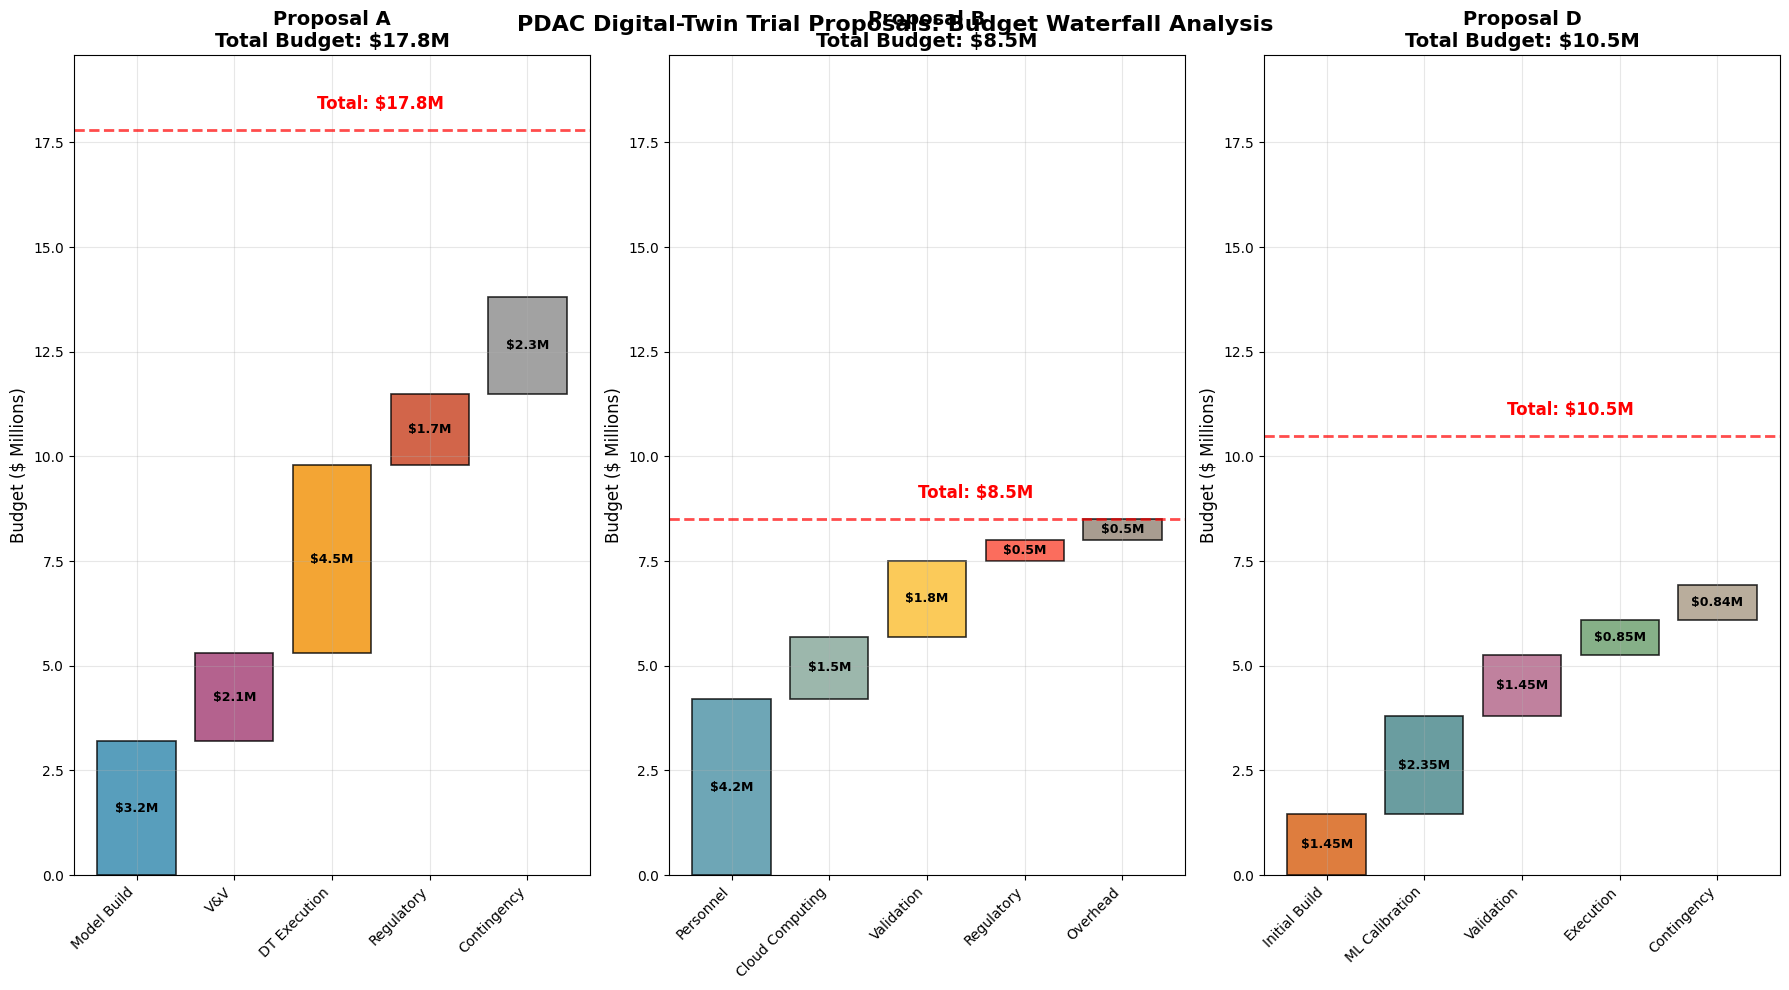

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle

# Budget breakdown data from proposals
def create_budget_waterfall():
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))

    proposals = {
        'Proposal A': {
            'base': 0,
            'components': [3.2, 2.1, 4.5, 1.7, 2.3],
            'labels': ['Model Build', 'V&V', 'DT Execution', 'Regulatory', 'Contingency'],
            'total': 17.8,
            'color_scheme': ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#8B8B8B']
        },
        'Proposal B': {
            'base': 0,
            'components': [4.2, 1.5, 1.8, 0.5, 0.5],
            'labels': ['Personnel', 'Cloud Computing', 'Validation', 'Regulatory', 'Overhead'],
            'total': 8.5,
            'color_scheme': ['#4A90A4', '#83A598', '#FABD2F', '#FB4934', '#928374']
        },
        'Proposal D': {
            'base': 0,
            'components': [1.45, 2.35, 1.45, 0.85, 0.84],
            'labels': ['Initial Build', 'ML Calibration', 'Validation', 'Execution', 'Contingency'],
            'total': 10.5,  # Adjusted total from text
            'color_scheme': ['#D65D0E', '#458588', '#B16286', '#689D6A', '#A89984']
        }
    }

    for idx, (prop_name, data) in enumerate(proposals.items()):
        ax = axes[idx]

        # Create waterfall chart
        cumulative = [0]
        for component in data['components']:
            cumulative.append(cumulative[-1] + component)

        # Plot bars
        for i, (component, label, color) in enumerate(zip(data['components'], data['labels'], data['color_scheme'])):
            ax.bar(i, component, bottom=cumulative[i], color=color, alpha=0.8,
                   edgecolor='black', linewidth=1.2, label=f'{label}: ${component}M')

            # Add value labels
            ax.text(i, cumulative[i] + component/2, f'${component}M',
                   ha='center', va='center', fontweight='bold', fontsize=9)

        # Add total line
        ax.axhline(y=data['total'], color='red', linestyle='--', linewidth=2, alpha=0.7)
        ax.text(len(data['components'])/2, data['total'] + 0.5, f'Total: ${data["total"]}M',
               ha='center', fontweight='bold', fontsize=12, color='red')

        ax.set_title(f'{prop_name}\nTotal Budget: ${data["total"]}M', fontsize=14, fontweight='bold')
        ax.set_ylabel('Budget ($ Millions)', fontsize=12)
        ax.set_xticks(range(len(data['labels'])))
        ax.set_xticklabels(data['labels'], rotation=45, ha='right')
        ax.grid(True, alpha=0.3)
        ax.set_ylim(0, max([p['total'] for p in proposals.values()]) * 1.1)

    plt.tight_layout()
    plt.suptitle('PDAC Digital-Twin Trial Proposals: Budget Waterfall Analysis',
                 fontsize=16, fontweight='bold', y=0.98)
    plt.savefig('budget_waterfall_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

create_budget_waterfall()

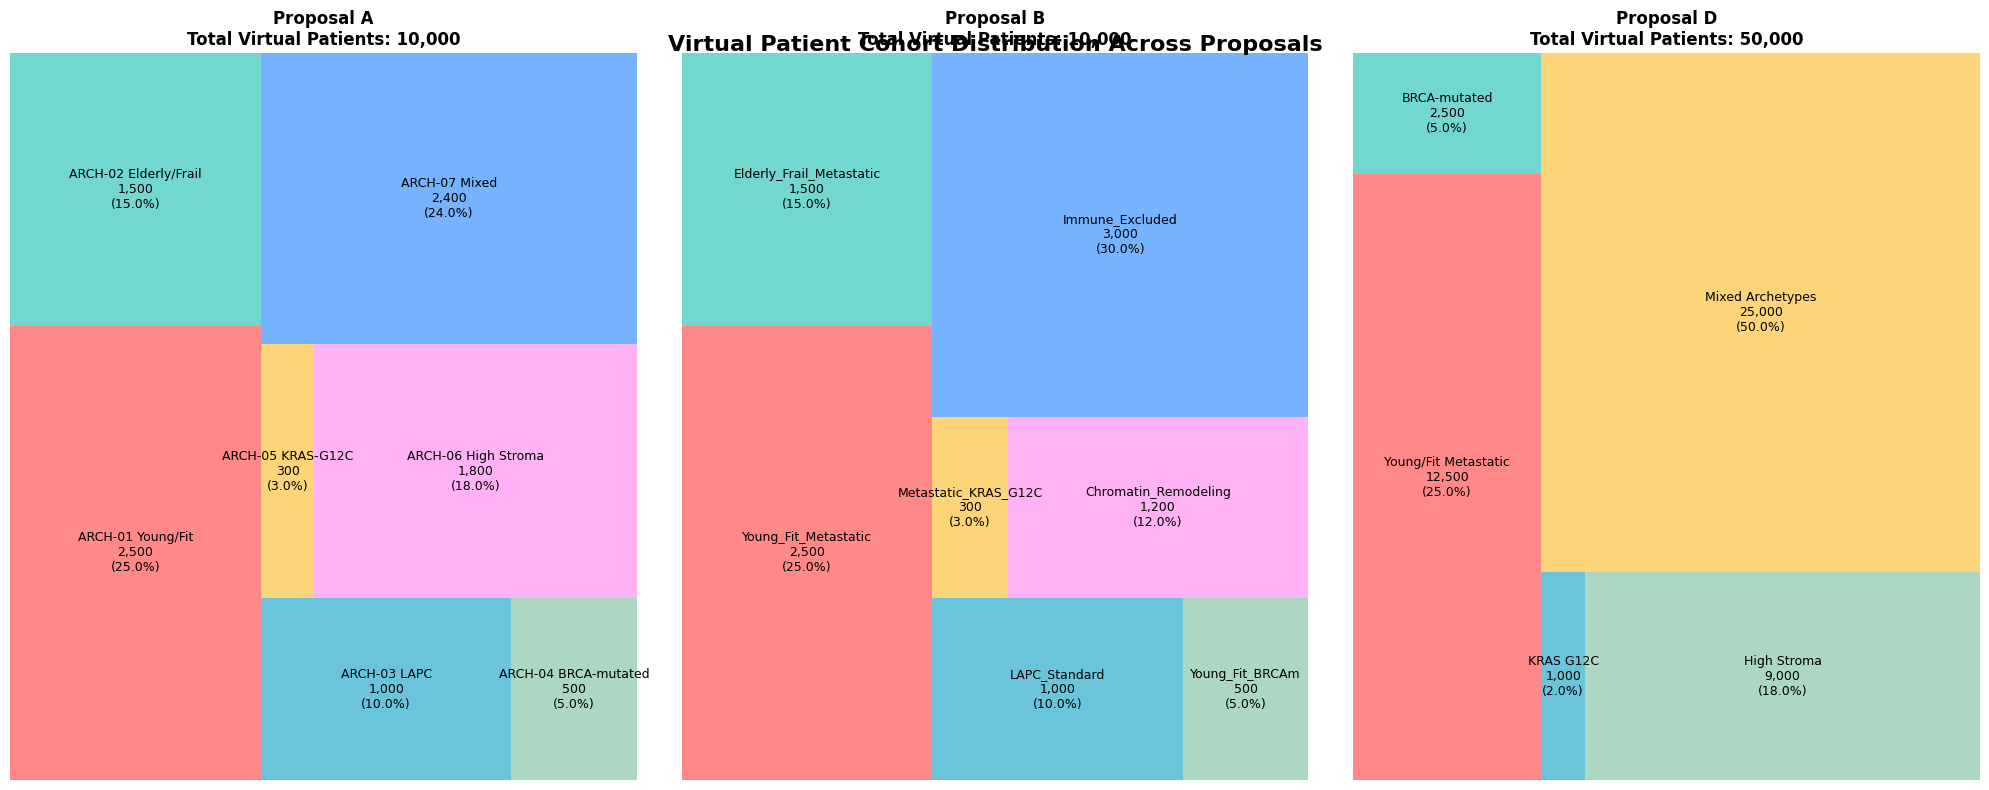

In [ ]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd

def create_patient_cohort_treemap():
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))

    # Patient cohort data from proposals
    cohort_data = {
        'Proposal A': {
            'ARCH-01 Young/Fit': 2500,
            'ARCH-02 Elderly/Frail': 1500,
            'ARCH-03 LAPC': 1000,
            'ARCH-04 BRCA-mutated': 500,
            'ARCH-05 KRAS-G12C': 300,
            'ARCH-06 High Stroma': 1800,
            'ARCH-07 Mixed': 2400
        },
        'Proposal B': {
            'Young_Fit_Metastatic': 2500,
            'Elderly_Frail_Metastatic': 1500,
            'LAPC_Standard': 1000,
            'Young_Fit_BRCAm': 500,
            'Metastatic_KRAS_G12C': 300,
            'Chromatin_Remodeling': 1200,
            'Immune_Excluded': 3000
        },
        'Proposal D': {
            'Young/Fit Metastatic': 12500,
            'BRCA-mutated': 2500,
            'KRAS G12C': 1000,
            'High Stroma': 9000,
            'Mixed Archetypes': 25000
        }
    }

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#5F27CD']

    for idx, (proposal, data) in enumerate(cohort_data.items()):
        ax = axes[idx]

        labels = list(data.keys())
        sizes = list(data.values())
        total = sum(sizes)

        # Create percentage labels
        pct_labels = [f'{label}\n{size:,}\n({size/total*100:.1f}%)'
                     for label, size in zip(labels, sizes)]

        # Create treemap
        squarify.plot(sizes=sizes, label=pct_labels, alpha=0.8,
                     color=colors[:len(sizes)], ax=ax, text_kwargs={'fontsize':9})

        ax.set_title(f'{proposal}\nTotal Virtual Patients: {total:,}',
                    fontsize=12, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.suptitle('Virtual Patient Cohort Distribution Across Proposals',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.savefig('patient_cohort_treemap.png', dpi=300, bbox_inches='tight')
    plt.show()

create_patient_cohort_treemap()

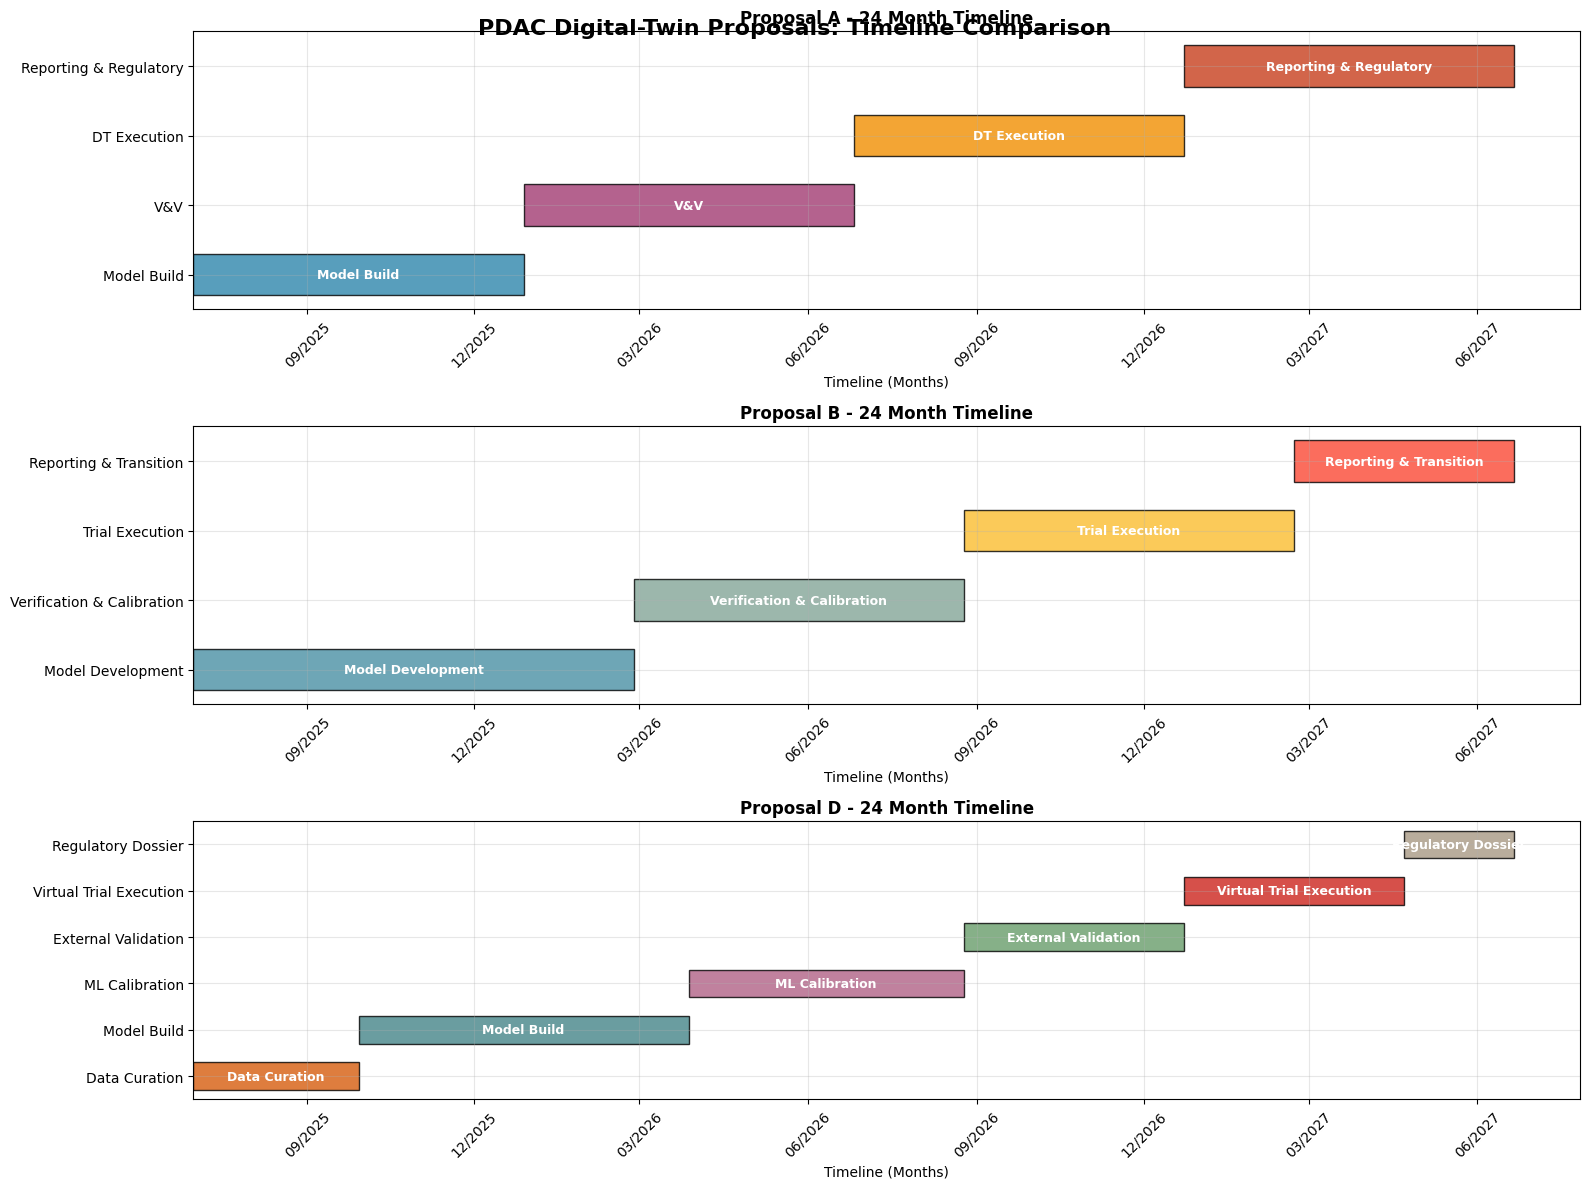

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates

def create_gantt_timeline():
    fig, axes = plt.subplots(3, 1, figsize=(16, 12))

    # Timeline data for each proposal
    timelines = {
        'Proposal A': [
            ('Model Build', 0, 6, '#2E86AB'),
            ('V&V', 6, 12, '#A23B72'),
            ('DT Execution', 12, 18, '#F18F01'),
            ('Reporting & Regulatory', 18, 24, '#C73E1D')
        ],
        'Proposal B': [
            ('Model Development', 0, 8, '#4A90A4'),
            ('Verification & Calibration', 8, 14, '#83A598'),
            ('Trial Execution', 14, 20, '#FABD2F'),
            ('Reporting & Transition', 20, 24, '#FB4934')
        ],
        'Proposal D': [
            ('Data Curation', 0, 3, '#D65D0E'),
            ('Model Build', 3, 9, '#458588'),
            ('ML Calibration', 9, 14, '#B16286'),
            ('External Validation', 14, 18, '#689D6A'),
            ('Virtual Trial Execution', 18, 22, '#CC241D'),
            ('Regulatory Dossier', 22, 24, '#A89984')
        ]
    }

    start_date = datetime(2025, 7, 1)  # Assuming start date

    for idx, (proposal, tasks) in enumerate(timelines.items()):
        ax = axes[idx]

        for i, (task, start_month, end_month, color) in enumerate(tasks):
            start_time = start_date + timedelta(days=start_month*30)
            duration = (end_month - start_month) * 30

            ax.barh(i, duration, left=start_time, height=0.6,
                   color=color, alpha=0.8, edgecolor='black')

            # Add task labels
            mid_time = start_time + timedelta(days=duration/2)
            ax.text(mid_time, i, task, ha='center', va='center',
                   fontweight='bold', fontsize=9, color='white')

        # Formatting
        ax.set_ylim(-0.5, len(tasks) - 0.5)
        ax.set_yticks(range(len(tasks)))
        ax.set_yticklabels([task[0] for task in tasks])
        ax.set_xlabel('Timeline (Months)', fontsize=10)
        ax.set_title(f'{proposal} - 24 Month Timeline', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)

        # Format x-axis
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.suptitle('PDAC Digital-Twin Proposals: Timeline Comparison',
                 fontsize=16, fontweight='bold', y=0.98)
    plt.savefig('gantt_timeline_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

create_gantt_timeline()

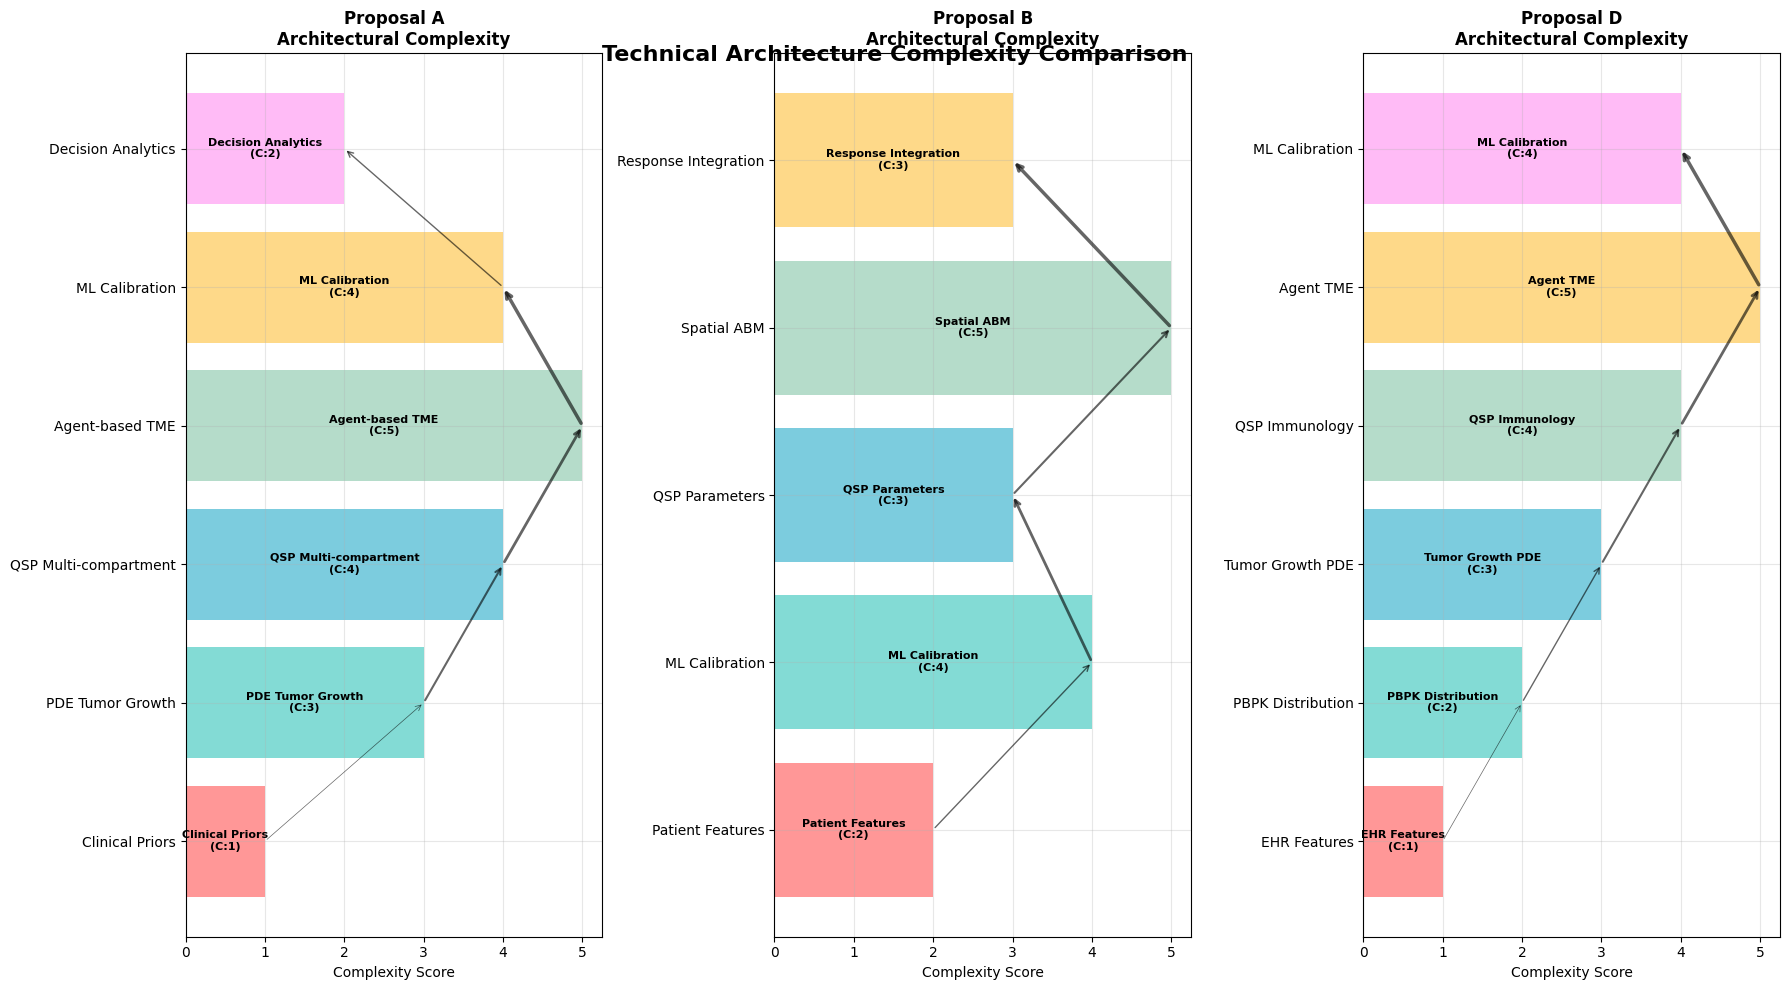

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.sankey import Sankey

def create_architecture_sankey():
    fig, axes = plt.subplots(1, 3, figsize=(18, 10))

    # Architecture complexity scores (derived from proposals)
    architectures = {
        'Proposal A': {
            'layers': ['Clinical Priors', 'PDE Tumor Growth', 'QSP Multi-compartment', 'Agent-based TME', 'ML Calibration', 'Decision Analytics'],
            'complexity': [1, 3, 4, 5, 4, 2],  # Complexity scores
            'connections': [(0,1,1), (1,2,3), (2,3,4), (3,4,5), (4,5,2)]
        },
        'Proposal B': {
            'layers': ['Patient Features', 'ML Calibration', 'QSP Parameters', 'Spatial ABM', 'Response Integration'],
            'complexity': [2, 4, 3, 5, 3],
            'connections': [(0,1,2), (1,2,4), (2,3,3), (3,4,5)]
        },
        'Proposal D': {
            'layers': ['EHR Features', 'PBPK Distribution', 'Tumor Growth PDE', 'QSP Immunology', 'Agent TME', 'ML Calibration'],
            'complexity': [1, 2, 3, 4, 5, 4],
            'connections': [(0,1,1), (1,2,2), (2,3,3), (3,4,4), (4,5,5)]
        }
    }

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']

    for idx, (proposal, arch) in enumerate(architectures.items()):
        ax = axes[idx]

        # Create simplified representation using stacked bars
        y_pos = np.arange(len(arch['layers']))
        bars = ax.barh(y_pos, arch['complexity'], color=colors[:len(arch['layers'])], alpha=0.7)

        # Add layer labels
        for i, (layer, complexity) in enumerate(zip(arch['layers'], arch['complexity'])):
            ax.text(complexity/2, i, f'{layer}\n(C:{complexity})',
                   ha='center', va='center', fontweight='bold', fontsize=8)

        # Add connection arrows
        for start, end, weight in arch['connections']:
            if start < len(arch['layers']) and end < len(arch['layers']):
                ax.annotate('', xy=(arch['complexity'][end], end),
                           xytext=(arch['complexity'][start], start),
                           arrowprops=dict(arrowstyle='->', lw=weight*0.5, alpha=0.6))

        ax.set_yticks(y_pos)
        ax.set_yticklabels(arch['layers'])
        ax.set_xlabel('Complexity Score', fontsize=10)
        ax.set_title(f'{proposal}\nArchitectural Complexity', fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Technical Architecture Complexity Comparison',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.savefig('architecture_sankey.png', dpi=300, bbox_inches='tight')
    plt.show()

create_architecture_sankey()

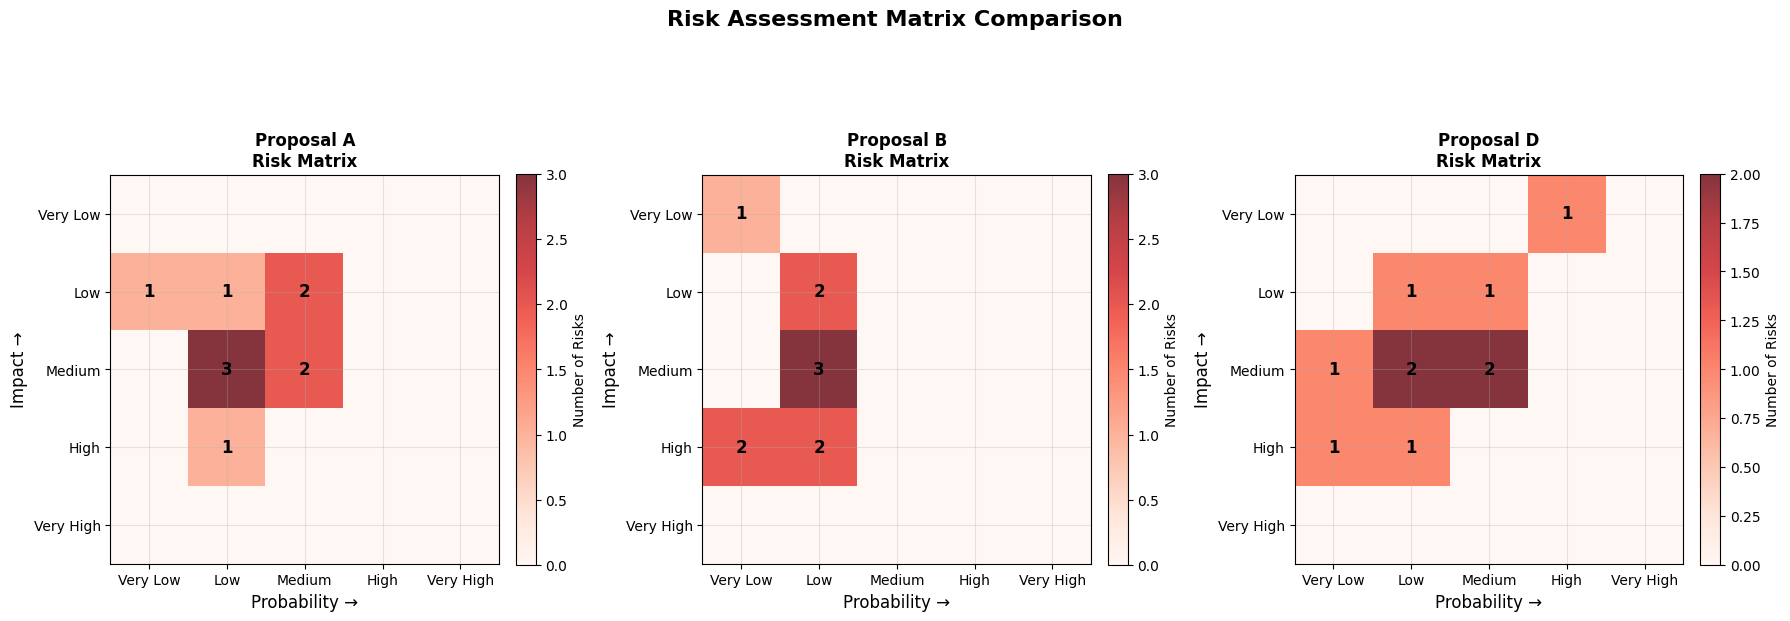

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

def create_risk_heatmap():
    fig, axes = plt.subplots(1, 3, figsize=(18, 8))

    # Risk data from proposals (Impact vs Probability)
    risks = {
        'Proposal A': {
            'Technical': {'Model over-fits': (3, 2), 'Runtime costs': (2, 3)},
            'Regulatory': {'FDA rejects DT': (4, 2), 'EMA delays': (3, 2)},
            'Data': {'Missing covariates': (3, 3), 'Quality issues': (2, 2)},
            'Commercial': {'Competitor first': (3, 3), 'IP challenges': (2, 1)},
            'Funding': {'Cost over-run': (2, 3), 'Timeline delay': (3, 2)}
        },
        'Proposal B': {
            'Technical': {'Model complexity': (4, 2), 'Parameter ID': (4, 1)},
            'Regulatory': {'FDA rejection': (4, 1), 'EMA delays': (3, 2)},
            'Commercial': {'Competing therapy': (3, 2), 'IP challenges': (1, 1)},
            'Data': {'Validation failure': (4, 2), 'Compute limits': (2, 2)},
            'Market': {'Partnership fails': (3, 2), 'Funding gap': (2, 2)}
        },
        'Proposal D': {
            'Technical': {'Model fidelity': (3, 2), 'Rare subtypes': (3, 3)},
            'Operational': {'Cloud costs': (1, 4), 'Resource limits': (2, 3)},
            'Regulatory': {'DT scepticism': (4, 2), 'Validation needs': (3, 3)},
            'Commercial': {'IP leakage': (4, 1), 'Market timing': (3, 1)},
            'Execution': {'Team scaling': (2, 2), 'Technology risk': (3, 2)}
        }
    }

    # Create risk matrices
    for idx, (proposal, risk_data) in enumerate(risks.items()):
        # Prepare matrix data
        matrix = np.zeros((5, 5))  # 5x5 risk matrix
        risk_labels = []

        for category, risk_items in risk_data.items():
            for risk_name, (impact, prob) in risk_items.items():
                matrix[impact-1, prob-1] += 1
                risk_labels.append(f'{category[:4]}: {risk_name[:8]}')

        # Create heatmap
        im = axes[idx].imshow(matrix, cmap='Reds', alpha=0.8)

        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)
        cbar.set_label('Number of Risks')

        # Add text annotations
        for i in range(5):
            for j in range(5):
                if matrix[i, j] > 0:
                    axes[idx].text(j, i, int(matrix[i, j]),
                                  ha='center', va='center', fontweight='bold', fontsize=12)

        # Labels and formatting
        axes[idx].set_xlabel('Probability →', fontsize=12)
        axes[idx].set_ylabel('Impact →', fontsize=12)
        axes[idx].set_title(f'{proposal}\nRisk Matrix', fontsize=12, fontweight='bold')
        axes[idx].set_xticks(range(5))
        axes[idx].set_yticks(range(5))
        axes[idx].set_xticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
        axes[idx].set_yticklabels(['Very Low', 'Low', 'Medium', 'High', 'Very High'])
        axes[idx].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Risk Assessment Matrix Comparison', fontsize=16, fontweight='bold', y=0.95)
    plt.savefig('risk_matrix_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

create_risk_heatmap()

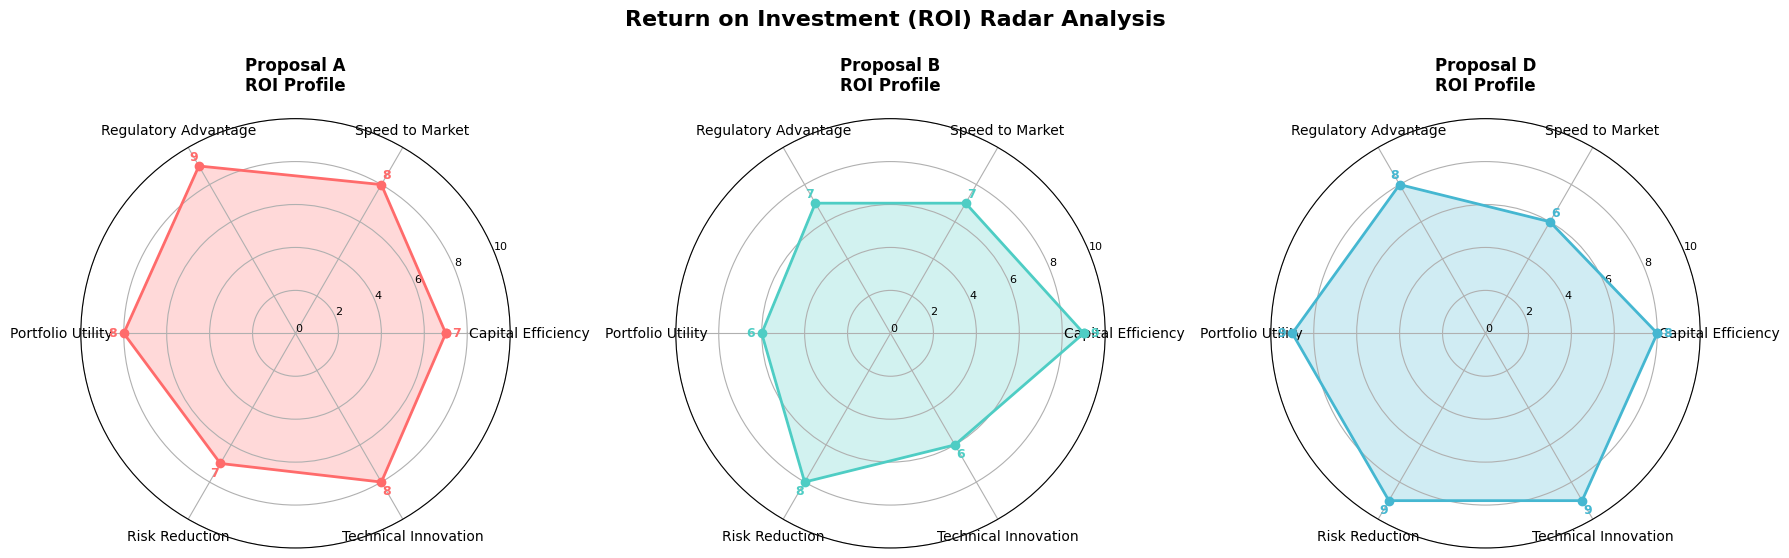

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_roi_radar():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))

    # ROI metrics (normalized 0-10 scale)
    metrics = ['Capital Efficiency', 'Speed to Market', 'Regulatory Advantage',
               'Portfolio Utility', 'Risk Reduction', 'Technical Innovation']

    proposals_data = {
        'Proposal A': [7, 8, 9, 8, 7, 8],  # High regulatory focus
        'Proposal B': [9, 7, 7, 6, 8, 6],  # High capital efficiency
        'Proposal D': [8, 6, 8, 9, 9, 9]   # High technical innovation
    }

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    # Number of variables
    N = len(metrics)

    # Compute angle for each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the circle

    for idx, (proposal, values) in enumerate(proposals_data.items()):
        ax = axes[idx]

        # Add values to complete the circle
        values += values[:1]

        # Plot
        ax.plot(angles, values, 'o-', linewidth=2, label=proposal, color=colors[idx])
        ax.fill(angles, values, alpha=0.25, color=colors[idx])

        # Add labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics, fontsize=10)
        ax.set_ylim(0, 10)
        ax.set_yticks(range(0, 11, 2))
        ax.set_yticklabels(range(0, 11, 2), fontsize=8)
        ax.grid(True)

        # Add value labels
        for angle, value, metric in zip(angles[:-1], values[:-1], metrics):
            ax.text(angle, value + 0.5, f'{value}', ha='center', va='center',
                   fontweight='bold', fontsize=9, color=colors[idx])

        ax.set_title(f'{proposal}\nROI Profile', fontsize=12, fontweight='bold', pad=20)

    # Add overall comparison
    fig.suptitle('Return on Investment (ROI) Radar Analysis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('roi_radar_chart.png', dpi=300, bbox_inches='tight')
    plt.show()

create_roi_radar()

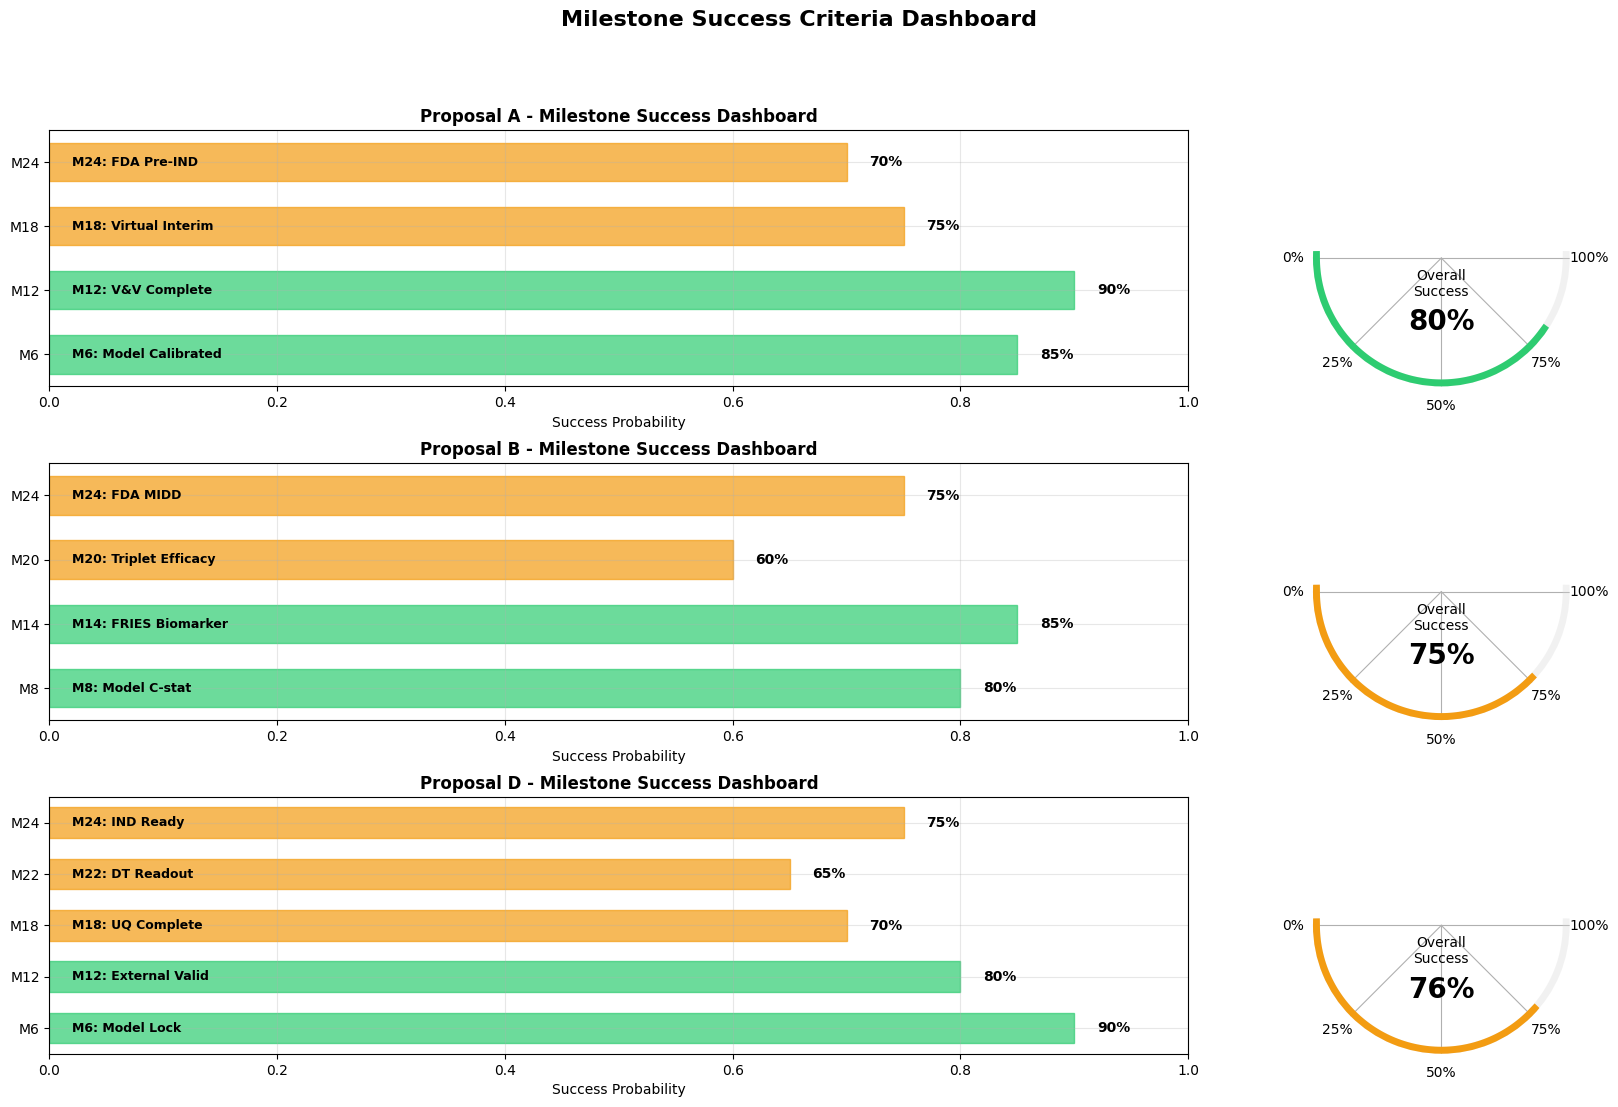

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_milestone_dashboard():
    fig = plt.figure(figsize=(20, 12))

    # Milestone data from proposals
    milestones = {
        'Proposal A': {
            'M6': {'metric': 'Model Calibrated', 'target': 'HR ≤ 0.1', 'status': 0.85},
            'M12': {'metric': 'V&V Complete', 'target': 'All Tier 2 Met', 'status': 0.90},
            'M18': {'metric': 'Virtual Interim', 'target': 'Pr(ORR) ≥ 0.8', 'status': 0.75},
            'M24': {'metric': 'FDA Pre-IND', 'target': 'Endorsement', 'status': 0.70}
        },
        'Proposal B': {
            'M8': {'metric': 'Model C-stat', 'target': '>0.75', 'status': 0.80},
            'M14': {'metric': 'FRIES Biomarker', 'target': '>3-fold', 'status': 0.85},
            'M20': {'metric': 'Triplet Efficacy', 'target': 'HR <0.65', 'status': 0.60},
            'M24': {'metric': 'FDA MIDD', 'target': 'Positive', 'status': 0.75}
        },
        'Proposal D': {
            'M6': {'metric': 'Model Lock', 'target': '<5% PK Error', 'status': 0.90},
            'M12': {'metric': 'External Valid', 'target': 'RMSE <1.5mo', 'status': 0.80},
            'M18': {'metric': 'UQ Complete', 'target': '95% CI <8%', 'status': 0.70},
            'M22': {'metric': 'DT Readout', 'target': '≥1 Arm Grad', 'status': 0.65},
            'M24': {'metric': 'IND Ready', 'target': 'No Hold', 'status': 0.75}
        }
    }

    # Create subplots
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    for prop_idx, (proposal, milestone_data) in enumerate(milestones.items()):
        # Main milestone timeline
        ax_main = fig.add_subplot(gs[prop_idx, :3])

        milestones_list = list(milestone_data.keys())
        statuses = [milestone_data[m]['status'] for m in milestones_list]

        # Create milestone bars
        bars = ax_main.barh(range(len(milestones_list)), statuses,
                           color=colors[prop_idx], alpha=0.7, height=0.6)

        # Add status indicators
        for i, (bar, status, milestone) in enumerate(zip(bars, statuses, milestones_list)):
            # Color coding based on success probability
            if status >= 0.8:
                bar.set_color('#2ECC71')  # Green
            elif status >= 0.6:
                bar.set_color('#F39C12')  # Orange
            else:
                bar.set_color('#E74C3C')  # Red

            # Add percentage text
            ax_main.text(status + 0.02, i, f'{status*100:.0f}%',
                        va='center', fontweight='bold', fontsize=10)

            # Add milestone details
            metric = milestone_data[milestone]['metric']
            target = milestone_data[milestone]['target']
            ax_main.text(0.02, i, f'{milestone}: {metric}',
                        va='center', fontweight='bold', fontsize=9)

        ax_main.set_xlim(0, 1)
        ax_main.set_ylim(-0.5, len(milestones_list) - 0.5)
        ax_main.set_yticks(range(len(milestones_list)))
        ax_main.set_yticklabels([f'M{m[1:]}' for m in milestones_list])
        ax_main.set_xlabel('Success Probability', fontsize=10)
        ax_main.set_title(f'{proposal} - Milestone Success Dashboard',
                         fontsize=12, fontweight='bold')
        ax_main.grid(True, alpha=0.3)

        # Success gauge
        ax_gauge = fig.add_subplot(gs[prop_idx, 3], projection='polar')

        # Calculate overall success score
        overall_score = np.mean(statuses)

        # Create gauge
        theta = np.linspace(0, np.pi, 100)
        r = np.ones_like(theta)

        # Background
        ax_gauge.plot(theta, r, color='lightgray', linewidth=10, alpha=0.3)

        # Success arc
        success_theta = np.linspace(0, overall_score * np.pi, 100)
        success_r = np.ones_like(success_theta)

        if overall_score >= 0.8:
            gauge_color = '#2ECC71'
        elif overall_score >= 0.6:
            gauge_color = '#F39C12'
        else:
            gauge_color = '#E74C3C'

        ax_gauge.plot(success_theta, success_r, color=gauge_color, linewidth=10)

        # Add score text
        ax_gauge.text(np.pi/2, 0.5, f'{overall_score*100:.0f}%',
                     ha='center', va='center', fontsize=20, fontweight='bold')
        ax_gauge.text(np.pi/2, 0.2, 'Overall\nSuccess',
                     ha='center', va='center', fontsize=10)

        ax_gauge.set_ylim(0, 1)
        ax_gauge.set_theta_zero_location('W')
        ax_gauge.set_theta_direction(1)
        ax_gauge.set_thetagrids([0, 45, 90, 135, 180],
                               ['0%', '25%', '50%', '75%', '100%'])
        ax_gauge.set_rgrids([])
        ax_gauge.spines['polar'].set_visible(False)

    plt.suptitle('Milestone Success Criteria Dashboard', fontsize=16, fontweight='bold')
    plt.savefig('milestone_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

create_milestone_dashboard()

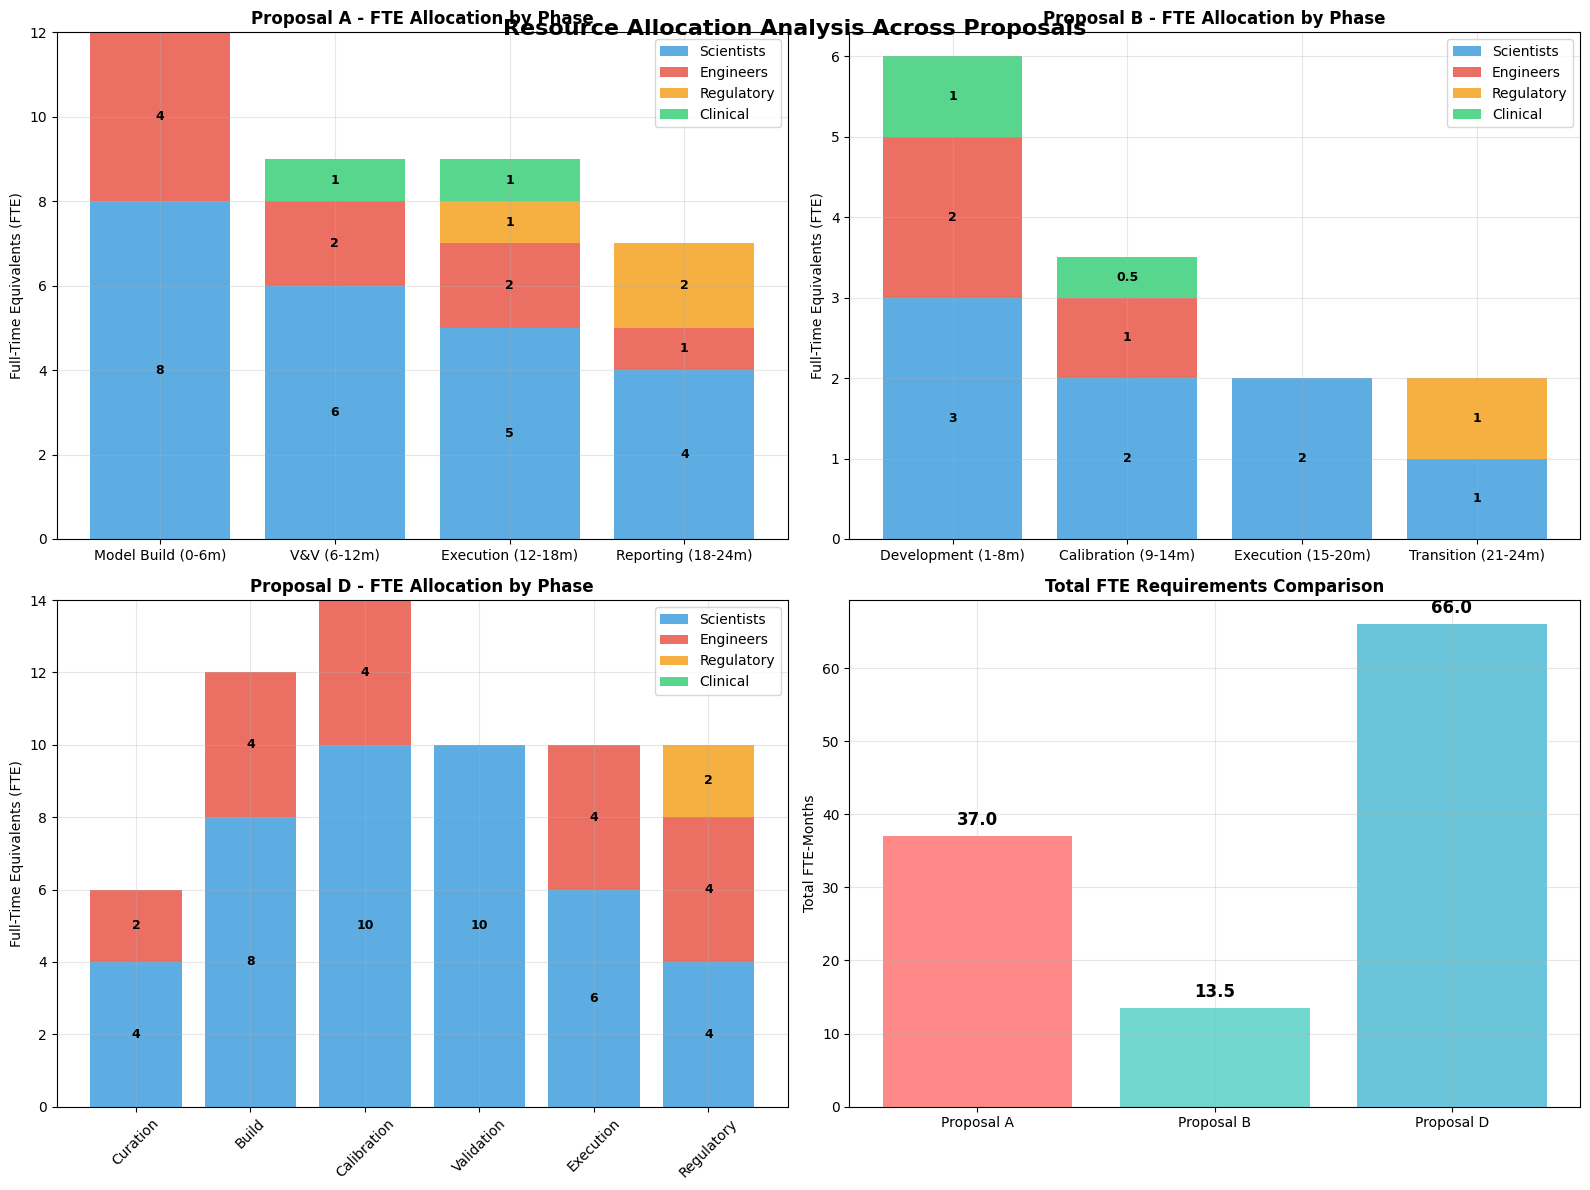

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def create_fte_allocation():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

    # FTE data by role and phase
    fte_data = {
        'Proposal A': {
            'Model Build (0-6m)': {'Scientists': 8, 'Engineers': 4, 'Regulatory': 0, 'Clinical': 0},
            'V&V (6-12m)': {'Scientists': 6, 'Engineers': 2, 'Regulatory': 0, 'Clinical': 1},
            'Execution (12-18m)': {'Scientists': 5, 'Engineers': 2, 'Regulatory': 1, 'Clinical': 1},
            'Reporting (18-24m)': {'Scientists': 4, 'Engineers': 1, 'Regulatory': 2, 'Clinical': 0}
        },
        'Proposal B': {
            'Development (1-8m)': {'Scientists': 3, 'Engineers': 2, 'Regulatory': 0, 'Clinical': 1},
            'Calibration (9-14m)': {'Scientists': 2, 'Engineers': 1, 'Regulatory': 0, 'Clinical': 0.5},
            'Execution (15-20m)': {'Scientists': 2, 'Engineers': 0, 'Regulatory': 0, 'Clinical': 0},
            'Transition (21-24m)': {'Scientists': 1, 'Engineers': 0, 'Regulatory': 1, 'Clinical': 0}
        },
        'Proposal D': {
            'Curation (0-3m)': {'Scientists': 4, 'Engineers': 2, 'Regulatory': 0, 'Clinical': 0},
            'Build (4-9m)': {'Scientists': 8, 'Engineers': 4, 'Regulatory': 0, 'Clinical': 0},
            'Calibration (10-14m)': {'Scientists': 10, 'Engineers': 4, 'Regulatory': 0, 'Clinical': 0},
            'Validation (15-18m)': {'Scientists': 10, 'engineers': 4, 'Regulatory': 0, 'Clinical': 0},
            'Execution (19-22m)': {'Scientists': 6, 'Engineers': 4, 'Regulatory': 0, 'Clinical': 0},
            'Regulatory (23-24m)': {'Scientists': 4, 'Engineers': 4, 'Regulatory': 2, 'Clinical': 0}
        }
    }

    roles = ['Scientists', 'Engineers', 'Regulatory', 'Clinical']
    colors = ['#3498DB', '#E74C3C', '#F39C12', '#2ECC71']

    # Plot 1: Proposal A
    phases_a = list(fte_data['Proposal A'].keys())
    bottom_a = np.zeros(len(phases_a))

    for i, role in enumerate(roles):
        values_a = [fte_data['Proposal A'][phase].get(role, 0) for phase in phases_a]
        ax1.bar(phases_a, values_a, bottom=bottom_a, label=role, color=colors[i], alpha=0.8)

        # Add value labels
        for j, (phase, value) in enumerate(zip(phases_a, values_a)):
            if value > 0:
                ax1.text(j, bottom_a[j] + value/2, str(value),
                        ha='center', va='center', fontweight='bold', fontsize=9)

        bottom_a += values_a

    ax1.set_title('Proposal A - FTE Allocation by Phase', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Full-Time Equivalents (FTE)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Proposal B
    phases_b = list(fte_data['Proposal B'].keys())
    bottom_b = np.zeros(len(phases_b))

    for i, role in enumerate(roles):
        values_b = [fte_data['Proposal B'][phase].get(role, 0) for phase in phases_b]
        ax2.bar(phases_b, values_b, bottom=bottom_b, label=role, color=colors[i], alpha=0.8)

        for j, (phase, value) in enumerate(zip(phases_b, values_b)):
            if value > 0:
                ax2.text(j, bottom_b[j] + value/2, str(value),
                        ha='center', va='center', fontweight='bold', fontsize=9)

        bottom_b += values_b

    ax2.set_title('Proposal B - FTE Allocation by Phase', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Full-Time Equivalents (FTE)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3: Proposal D
    phases_d = list(fte_data['Proposal D'].keys())
    bottom_d = np.zeros(len(phases_d))

    for i, role in enumerate(roles):
        values_d = [fte_data['Proposal D'][phase].get(role, 0) for phase in phases_d]
        ax3.bar(range(len(phases_d)), values_d, bottom=bottom_d, label=role, color=colors[i], alpha=0.8)

        for j, value in enumerate(values_d):
            if value > 0:
                ax3.text(j, bottom_d[j] + value/2, str(value),
                        ha='center', va='center', fontweight='bold', fontsize=9)

        bottom_d += values_d

    ax3.set_title('Proposal D - FTE Allocation by Phase', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Full-Time Equivalents (FTE)')
    ax3.set_xticks(range(len(phases_d)))
    ax3.set_xticklabels([p.split()[0] for p in phases_d], rotation=45)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Plot 4: Total FTE Comparison
    totals = {}
    for proposal, data in fte_data.items():
        total_fte = 0
        for phase, roles_dict in data.items():
            total_fte += sum(roles_dict.values())
        totals[proposal] = total_fte

    proposal_names = list(totals.keys())
    total_ftes = list(totals.values())

    bars = ax4.bar(proposal_names, total_ftes, color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)

    # Add value labels
    for bar, total in zip(bars, total_ftes):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{total:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

    ax4.set_title('Total FTE Requirements Comparison', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Total FTE-Months')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Resource Allocation Analysis Across Proposals',
                 fontsize=16, fontweight='bold', y=0.98)
    plt.savefig('fte_allocation_stacked.png', dpi=300, bbox_inches='tight')
    plt.show()

create_fte_allocation()

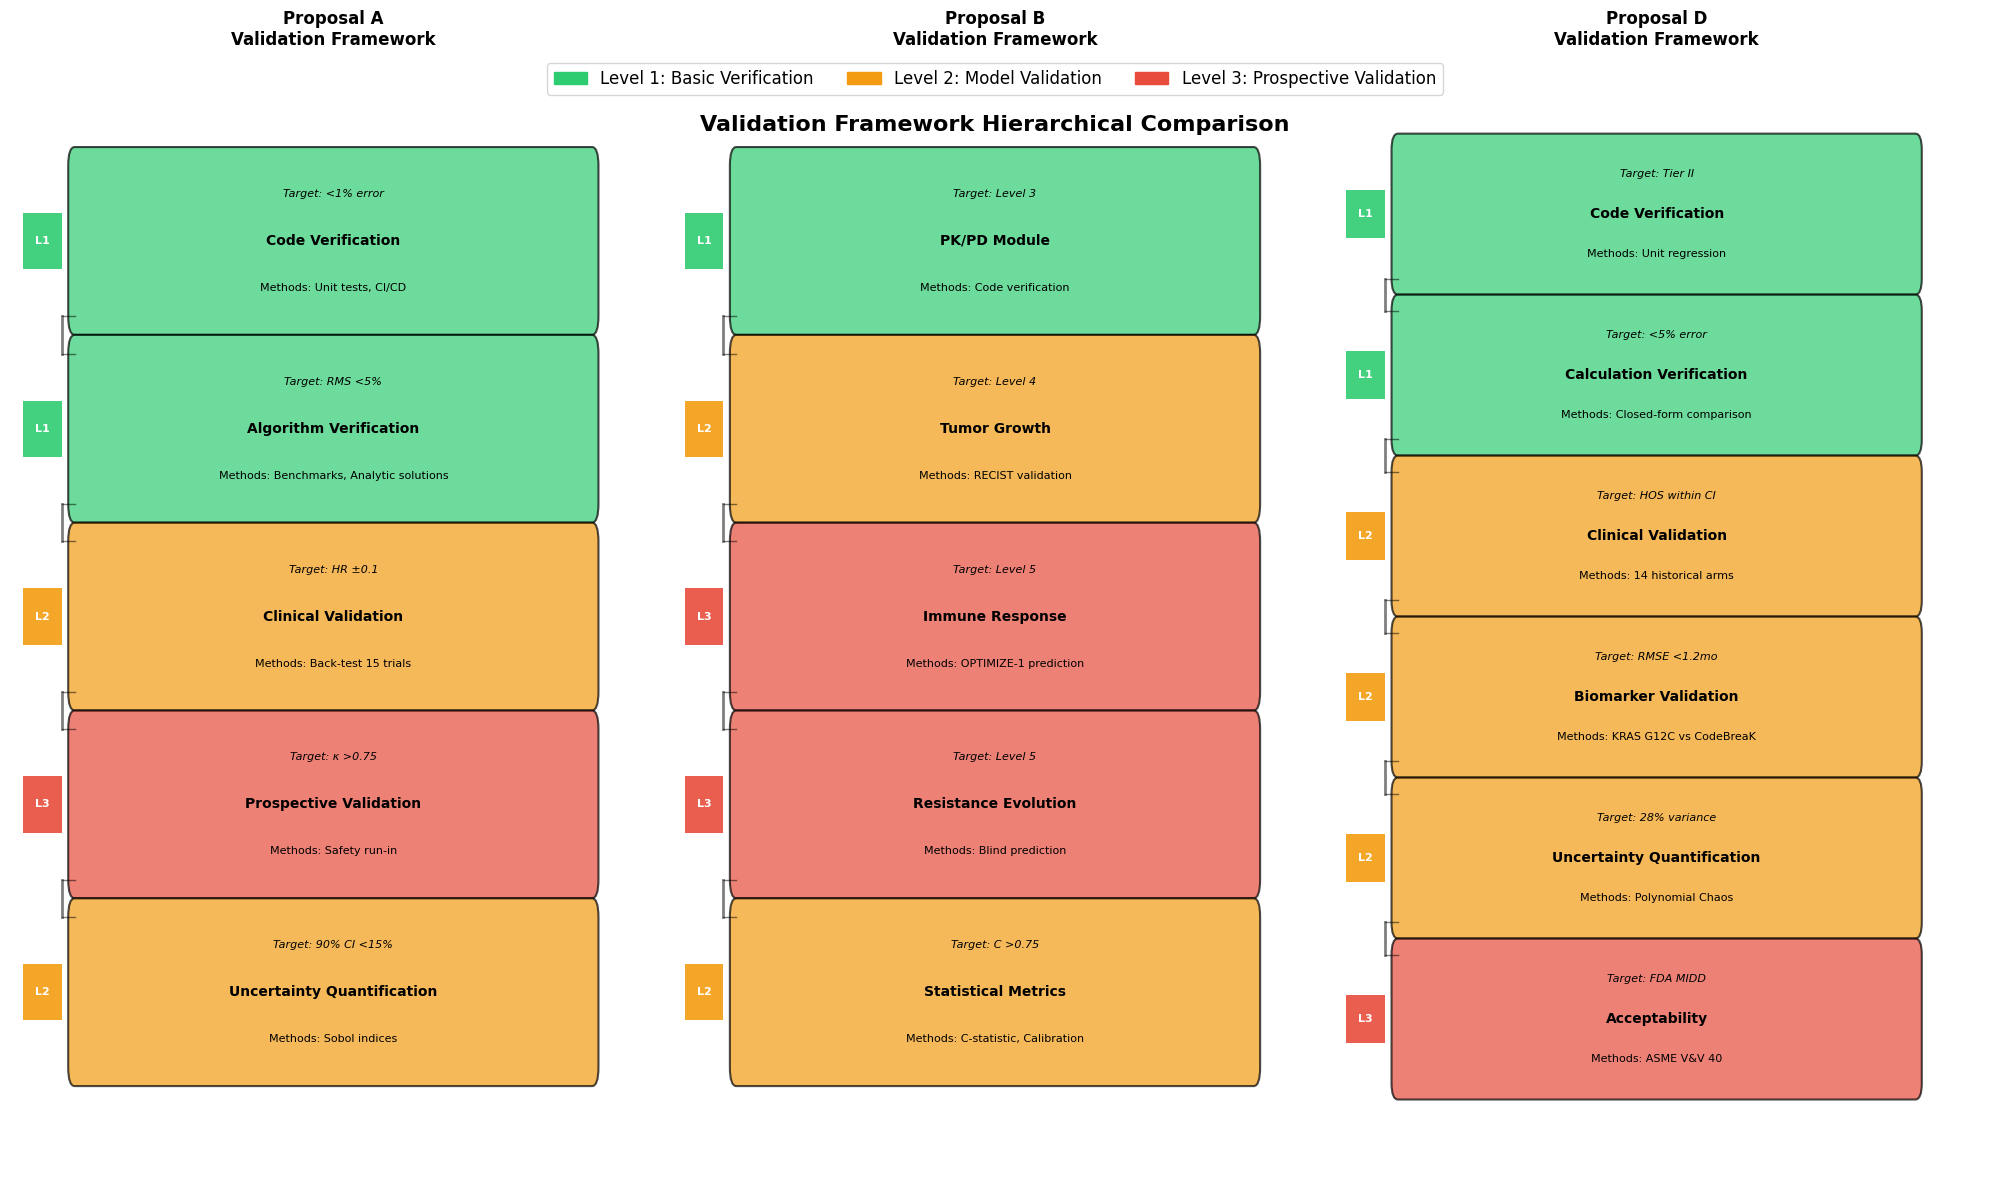

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyBboxPatch
import matplotlib.patches as mpatches

def create_validation_tree():
    fig, axes = plt.subplots(1, 3, figsize=(20, 12))

    # Validation frameworks from proposals
    validation_data = {
        'Proposal A': {
            'Code Verification': {'level': 1, 'methods': ['Unit tests', 'CI/CD'], 'target': '<1% error'},
            'Algorithm Verification': {'level': 1, 'methods': ['Benchmarks', 'Analytic solutions'], 'target': 'RMS <5%'},
            'Clinical Validation': {'level': 2, 'methods': ['Back-test 15 trials'], 'target': 'HR ±0.1'},
            'Prospective Validation': {'level': 3, 'methods': ['Safety run-in'], 'target': 'κ >0.75'},
            'Uncertainty Quantification': {'level': 2, 'methods': ['Sobol indices'], 'target': '90% CI <15%'}
        },
        'Proposal B': {
            'PK/PD Module': {'level': 1, 'methods': ['Code verification'], 'target': 'Level 3'},
            'Tumor Growth': {'level': 2, 'methods': ['RECIST validation'], 'target': 'Level 4'},
            'Immune Response': {'level': 3, 'methods': ['OPTIMIZE-1 prediction'], 'target': 'Level 5'},
            'Resistance Evolution': {'level': 3, 'methods': ['Blind prediction'], 'target': 'Level 5'},
            'Statistical Metrics': {'level': 2, 'methods': ['C-statistic', 'Calibration'], 'target': 'C >0.75'}
        },
        'Proposal D': {
            'Code Verification': {'level': 1, 'methods': ['Unit regression'], 'target': 'Tier II'},
            'Calculation Verification': {'level': 1, 'methods': ['Closed-form comparison'], 'target': '<5% error'},
            'Clinical Validation': {'level': 2, 'methods': ['14 historical arms'], 'target': 'HOS within CI'},
            'Biomarker Validation': {'level': 2, 'methods': ['KRAS G12C vs CodeBreaK'], 'target': 'RMSE <1.2mo'},
            'Uncertainty Quantification': {'level': 2, 'methods': ['Polynomial Chaos'], 'target': '28% variance'},
            'Acceptability': {'level': 3, 'methods': ['ASME V&V 40'], 'target': 'FDA MIDD'}
        }
    }

    # Colors for different validation levels
    level_colors = {1: '#2ECC71', 2: '#F39C12', 3: '#E74C3C'}

    for idx, (proposal, val_data) in enumerate(validation_data.items()):
        ax = axes[idx]
        ax.set_xlim(0, 10)
        ax.set_ylim(0, len(val_data) + 1)

        # Draw validation tree
        y_positions = list(range(1, len(val_data) + 1))

        for i, (val_name, val_info) in enumerate(val_data.items()):
            y_pos = len(val_data) - i
            level = val_info['level']
            color = level_colors[level]

            # Main validation box
            box = FancyBboxPatch((1, y_pos - 0.4), 8, 0.8,
                               boxstyle="round,pad=0.1",
                               facecolor=color, alpha=0.7,
                               edgecolor='black', linewidth=1.5)
            ax.add_patch(box)

            # Add text
            ax.text(5, y_pos, val_name, ha='center', va='center',
                   fontweight='bold', fontsize=10)
            ax.text(5, y_pos - 0.25, f"Methods: {', '.join(val_info['methods'][:2])}",
                   ha='center', va='center', fontsize=8)
            ax.text(5, y_pos + 0.25, f"Target: {val_info['target']}",
                   ha='center', va='center', fontsize=8, style='italic')

            # Level indicator
            level_box = Rectangle((0.2, y_pos - 0.15), 0.6, 0.3,
                                facecolor=color, alpha=0.9)
            ax.add_patch(level_box)
            ax.text(0.5, y_pos, f'L{level}', ha='center', va='center',
                   fontweight='bold', fontsize=8, color='white')

        # Add connecting lines (simplified tree structure)
        for i in range(len(val_data) - 1):
            y1 = len(val_data) - i
            y2 = len(val_data) - i - 1
            ax.plot([0.8, 0.8], [y1 - 0.4, y2 + 0.4], 'k-', alpha=0.5, linewidth=2)
            ax.plot([0.8, 1], [y1 - 0.4, y1 - 0.4], 'k-', alpha=0.5, linewidth=1)
            ax.plot([0.8, 1], [y2 + 0.4, y2 + 0.4], 'k-', alpha=0.5, linewidth=1)

        ax.set_title(f'{proposal}\nValidation Framework', fontsize=12, fontweight='bold')
        ax.set_xlim(0, 10)
        ax.set_ylim(0, len(val_data) + 1)
        ax.axis('off')

    # Add legend
    legend_elements = [mpatches.Patch(color=level_colors[1], label='Level 1: Basic Verification'),
                      mpatches.Patch(color=level_colors[2], label='Level 2: Model Validation'),
                      mpatches.Patch(color=level_colors[3], label='Level 3: Prospective Validation')]

    fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95),
               ncol=3, fontsize=12)

    plt.tight_layout()
    plt.suptitle('Validation Framework Hierarchical Comparison',
                 fontsize=16, fontweight='bold', y=0.90)
    plt.savefig('validation_tree_hierarchy.png', dpi=300, bbox_inches='tight')
    plt.show()

create_validation_tree()

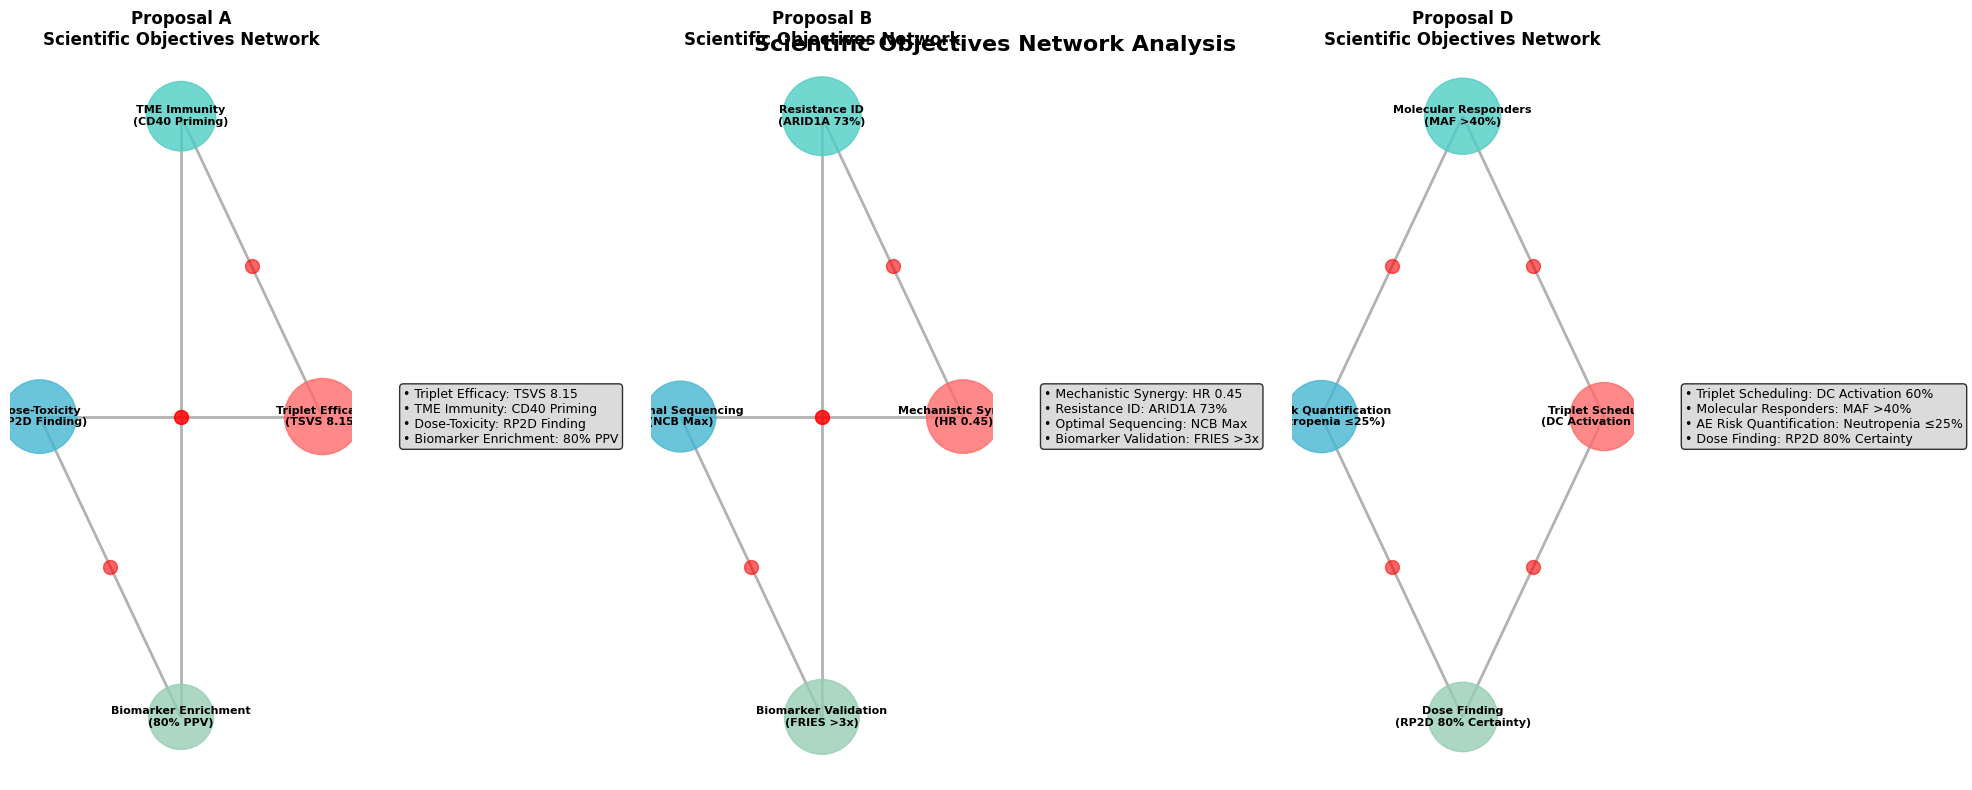

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def create_objectives_network():
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))

    # Scientific objectives and their relationships
    objectives_data = {
        'Proposal A': {
            'nodes': ['Triplet Efficacy', 'TME Immunity', 'Dose-Toxicity', 'Biomarker Enrichment'],
            'edges': [('Triplet Efficacy', 'TME Immunity'), ('TME Immunity', 'Biomarker Enrichment'),
                     ('Dose-Toxicity', 'Triplet Efficacy'), ('Biomarker Enrichment', 'Dose-Toxicity')],
            'node_sizes': [3000, 2500, 2800, 2200],
            'objectives': {
                'Triplet Efficacy': 'TSVS 8.15',
                'TME Immunity': 'CD40 Priming',
                'Dose-Toxicity': 'RP2D Finding',
                'Biomarker Enrichment': '80% PPV'
            }
        },
        'Proposal B': {
            'nodes': ['Mechanistic Synergy', 'Resistance ID', 'Optimal Sequencing', 'Biomarker Validation'],
            'edges': [('Mechanistic Synergy', 'Resistance ID'), ('Resistance ID', 'Biomarker Validation'),
                     ('Optimal Sequencing', 'Mechanistic Synergy'), ('Biomarker Validation', 'Optimal Sequencing')],
            'node_sizes': [2800, 3200, 2600, 2900],
            'objectives': {
                'Mechanistic Synergy': 'HR 0.45',
                'Resistance ID': 'ARID1A 73%',
                'Optimal Sequencing': 'NCB Max',
                'Biomarker Validation': 'FRIES >3x'
            }
        },
        'Proposal D': {
            'nodes': ['Triplet Scheduling', 'Molecular Responders', 'AE Risk Quantification', 'Dose Finding'],
            'edges': [('Triplet Scheduling', 'Molecular Responders'), ('Molecular Responders', 'AE Risk Quantification'),
                     ('AE Risk Quantification', 'Dose Finding'), ('Dose Finding', 'Triplet Scheduling')],
            'node_sizes': [2400, 3000, 2700, 2500],
            'objectives': {
                'Triplet Scheduling': 'DC Activation 60%',
                'Molecular Responders': 'MAF >40%',
                'AE Risk Quantification': 'Neutropenia ≤25%',
                'Dose Finding': 'RP2D 80% Certainty'
            }
        }
    }

    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    for idx, (proposal, data) in enumerate(objectives_data.items()):
        ax = axes[idx]

        # Create network graph
        G = nx.Graph()
        G.add_nodes_from(data['nodes'])
        G.add_edges_from(data['edges'])

        # Position nodes in a circle
        pos = nx.circular_layout(G)

        # Draw network
        nx.draw_networkx_nodes(G, pos, node_color=colors[:len(data['nodes'])],
                              node_size=data['node_sizes'], alpha=0.8, ax=ax)

        nx.draw_networkx_edges(G, pos, edge_color='gray', width=2, alpha=0.6, ax=ax)

        # Add labels with objectives
        labels = {}
        for node in data['nodes']:
            objective = data['objectives'][node]
            labels[node] = f"{node}\n({objective})"

        nx.draw_networkx_labels(G, pos, labels, font_size=8, font_weight='bold', ax=ax)

        # Add connections strength indicators
        for edge in data['edges']:
            x1, y1 = pos[edge[0]]
            x2, y2 = pos[edge[1]]
            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2

            # Add connection strength indicator
            ax.scatter(mid_x, mid_y, s=100, c='red', alpha=0.6, marker='o')

        ax.set_title(f'{proposal}\nScientific Objectives Network',
                    fontsize=12, fontweight='bold')
        ax.axis('off')

        # Add objective details as text box
        objectives_text = '\n'.join([f"• {obj}: {target}"
                                   for obj, target in data['objectives'].items()])
        ax.text(1.15, 0.5, objectives_text, transform=ax.transAxes, fontsize=9,
               verticalalignment='center', bbox=dict(boxstyle="round,pad=0.3",
                                                   facecolor='lightgray', alpha=0.8))

    plt.tight_layout()
    plt.suptitle('Scientific Objectives Network Analysis',
                 fontsize=16, fontweight='bold', y=0.95)
    plt.savefig('objectives_network_diagram.png', dpi=300, bbox_inches='tight')
    plt.show()

create_objectives_network()